In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from scipy.stats import f
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller as adf

In [2]:
gdp = pd.read_csv("GDP_Growth.csv")
debt = pd.read_csv("public_debt.csv")

In [3]:
gdp.head()

,date,value
0,1/1/1947,2034.450
1,4/1/1947,2029.024
2,7/1/1947,2024.834
3,10/1/1947,2056.508
4,1/1/1948,2087.442


In [4]:
debt.head()

,date,value
0,1966-01-01,320999.0
1,1966-04-01,316097.0
2,1966-07-01,324748.0
3,1966-10-01,329319.0
4,1967-01-01,330947.0


In [5]:
gdp.tail()

,date,value
301,4/1/2022,19895.271
302,7/1/2022,20054.663
303,10/1/2022,20182.491
304,1/1/2023,20282.760
305,4/1/2023,20404.088


In [6]:
debt.tail()

,date,value
224,2022-01-01,30400960.0
225,2022-04-01,30568582.0
226,2022-07-01,30928912.0
227,2022-10-01,31419689.0
228,2023-01-01,31458438.0


In [7]:
np.where(gdp["date"] == "1/1/1966")[0][0]

76

In [8]:
gdp = gdp.iloc[76:len(gdp)-1, :].reset_index().iloc[:, 1:]

In [9]:
X = np.array(gdp["value"])
Y = np.array(debt["value"])

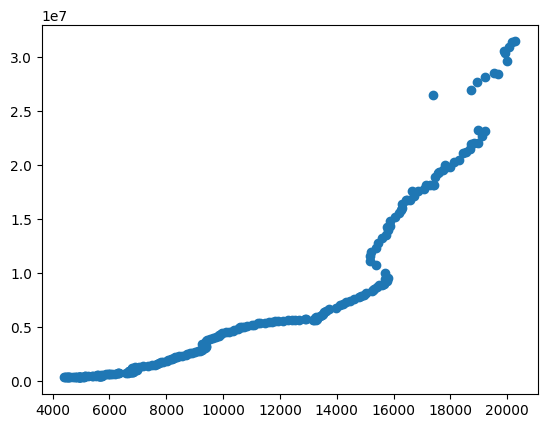

In [10]:
plt.scatter(X, Y)

In [30]:
grangercausalitytests(np.vstack([Y, X]).T, [4])


Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.8336  , p=0.0009  , df_denom=216, df_num=4
ssr based chi2 test:   chi2=20.1401 , p=0.0005  , df=4
likelihood ratio test: chi2=19.2891 , p=0.0007  , df=4
parameter F test:         F=4.8336  , p=0.0009  , df_denom=216, df_num=4


{4: ({'ssr_ftest': (4.833618756528699, 0.0009406208563516944, 216.0, 4),
   'ssr_chi2test': (20.140078152202914, 0.00046858323960858266, 4),
   'lrtest': (19.289113315865507, 0.0006895247206454846, 4),
   'params_ftest': (4.833618756529079, 0.0009406208563511025, 216.0, 4.0)},
   array([[0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

In [12]:
grangercausalitytests(np.vstack([X, Y]).T, [4])


Granger Causality
number of lags (no zero) 4
ssr based F test:         F=11.3301 , p=0.0000  , df_denom=216, df_num=4
ssr based chi2 test:   chi2=47.2086 , p=0.0000  , df=4
likelihood ratio test: chi2=42.8554 , p=0.0000  , df=4
parameter F test:         F=11.3301 , p=0.0000  , df_denom=216, df_num=4


{4: ({'ssr_ftest': (11.330066481394832, 2.2984941190763077e-08, 216.0, 4),
   'ssr_chi2test': (47.20861033914513, 1.3797220997446821e-09, 4),
   'lrtest': (42.85537198023485, 1.1088139507294123e-08, 4),
   'params_ftest': (11.33006648139003, 2.298494119093782e-08, 216.0, 4.0)},
   array([[0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

In [13]:
adf(X, 3, autolag = None)

(1.625899620509146,
 0.997933233989359,
 3,
 225,
 {'1%': -3.4597521044060353,
  '5%': -2.874472927517147,
  '10%': -2.5736628197530864})

In [14]:
maxlag = 100
lags = list(range(1, maxlag + 1))
X_p = [adf(X, i, autolag = None)[1] for i in range(1, maxlag + 1)]
Y_p = [adf(Y, i, autolag = None)[1] for i in range(1, maxlag + 1)]

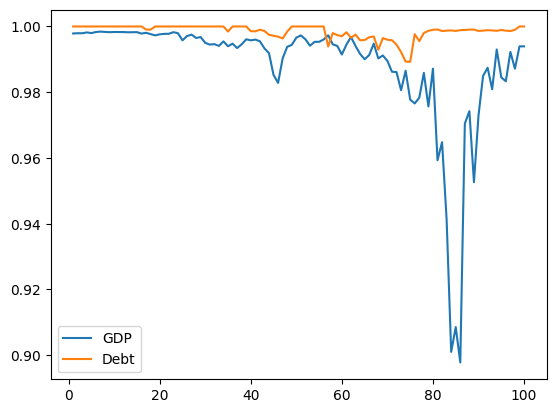

In [15]:
plt.plot(lags, X_p, label = "GDP")
plt.plot(lags, Y_p, label = "Debt")
plt.legend()
plt.show()

In [16]:
adf(Y)

(4.174535446322641,
 1.0,
 13,
 215,
 {'1%': -3.461136478222043,
  '5%': -2.875078880098608,
  '10%': -2.5739861168199027},
 5872.419703762353)

In [17]:
def linReg(x, y):
    y = y.reshape((len(y), 1))
    x = np.hstack((np.ones((len(x), 1)), x.reshape((len(x), 1))))
    return np.dot(np.dot(np.linalg.inv(np.dot(x.T, x)), x.T), y)

In [18]:
def quadReg(x, y):
    y = y.reshape((len(y), 1))
    x = np.hstack((np.ones((len(x), 1)), x.reshape((len(x), 1)), (x**2).reshape((len(x), 1))))
    return np.dot(np.dot(np.linalg.inv(np.dot(x.T, x)), x.T), y)

In [19]:
def F_Value_Lin(X, Y, z):
    X1 = X[X <= z]
    Y1 = Y[X <= z]
    X2 = X[X > z]
    Y2 = Y[X > z]
    B1 = linReg(X1, Y1)
    B2 = linReg(X2, Y2)
    B = linReg(X, Y)
    e1 = Y1 - np.dot(np.hstack((np.ones((len(X1), 1)), X1.reshape((len(X1), 1)))), B1)
    e2 = Y2 - np.dot(np.hstack((np.ones((len(X2), 1)), X2.reshape((len(X2), 1)))), B2)
    e = Y - np.dot(np.hstack((np.ones((len(X), 1)), X.reshape((len(X), 1)))), B)
    e = e[0][0]
    e1 = e1[0][0]
    e2 = e2[0][0]
    n = len(X1)
    m = len(X2)
    p = 2
    f_v = (n + m - 2*p)/p * (np.dot(e.T, e) - np.dot(e1.T, e1) - np.dot(e2.T, e2))/(np.dot(e1.T, e1) + np.dot(e2.T, e2))
    return 1 - f.cdf(f_v, p, n + m - 2*p)

In [20]:
def F_Value_Quad(X, Y, z):
    X1 = X[X <= z]
    Y1 = Y[X <= z]
    X2 = X[X > z]
    Y2 = Y[X > z]
    B1 = quadReg(X1, Y1)
    B2 = quadReg(X2, Y2)
    B = quadReg(X, Y)
    e1 = Y1 - np.dot(np.hstack((np.ones((len(X1), 1)), X1.reshape((len(X1), 1)), (X1**2).reshape((len(X1), 1)))), B1)
    e2 = Y2 - np.dot(np.hstack((np.ones((len(X2), 1)), X2.reshape((len(X2), 1)), (X2**2).reshape((len(X2), 1)))), B2)
    e = Y - np.dot(np.hstack((np.ones((len(X), 1)), X.reshape((len(X), 1)), (X**2).reshape((len(X), 1)))), B)
    e = e[0][0]
    e1 = e1[0][0]
    e2 = e2[0][0]
    n = len(X1)
    m = len(X2)
    p = 3
    f_v = (n + m - 2*p)/p * (np.dot(e.T, e) - np.dot(e1.T, e1) - np.dot(e2.T, e2))/(np.dot(e1.T, e1) + np.dot(e2.T, e2))
    return 1 - f.cdf(f_v, p, n + m - 2*p)

In [21]:
F_Val_Lin = []
for i in range(0, len(X)):
    try:
        F_Val_Lin.append(F_Value_Lin(X, Y, X[i]))
    except:
        F_Val_Lin.append(1e9)
F_Val_Lin = np.array(F_Val_Lin)
print(min(F_Val_Lin))
print(X[np.where(F_Val_Lin == min(F_Val_Lin))[0][0]])

1.1102230246251565e-16
6333.848


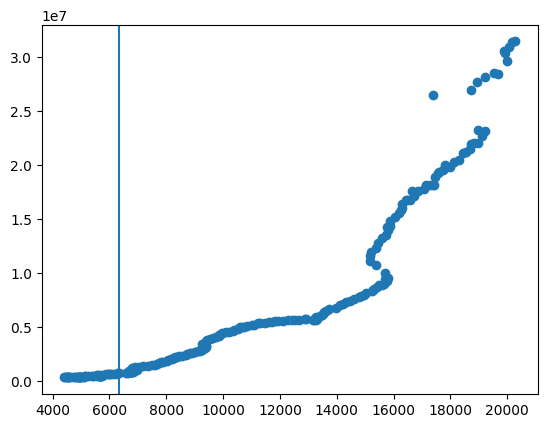

In [22]:
plt.scatter(X, Y)
plt.axvline(X[np.where(F_Val_Lin == min(F_Val_Lin))[0][0]])

In [23]:
F_Val_Quad = []
for i in range(0, len(X)):
    try:
        F_Val_Quad.append(F_Value_Quad(X, Y, X[i]))
    except:
        F_Val_Quad.append(1e9)
F_Val_Quad = np.array(F_Val_Quad)
print(min(F_Val_Quad))
print(X[np.where(F_Val_Quad == min(F_Val_Quad))[0][0]])

1.1102230246251565e-16
9404.494


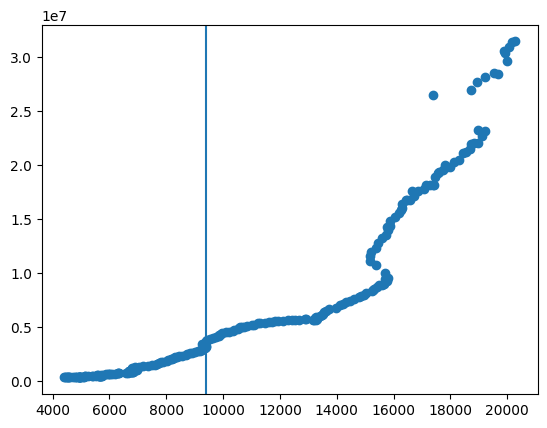

In [24]:
plt.scatter(X, Y)
plt.axvline(X[np.where(F_Val_Quad == min(F_Val_Quad))[0][0]])